<a href="https://colab.research.google.com/github/farid-maulana/PCVK_Genap_2022/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv_imshow
import numpy as np
import matplotlib.pyplot as plt

# **Global Tresholding**

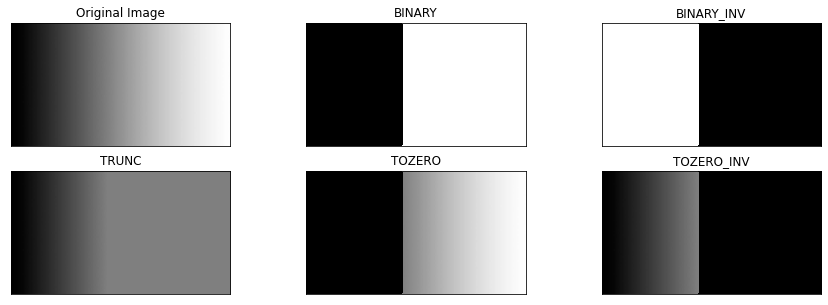

In [3]:
img = cv.imread('/content/drive/MyDrive/Images/gradient.jpg')
# Threshold value
thresh = 127     

ret, thresh1 = cv.threshold(img, thresh,255,cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, thresh,255,cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, thresh,255,cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, thresh,255,cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation = 'nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

# **Otsu Tresholding**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


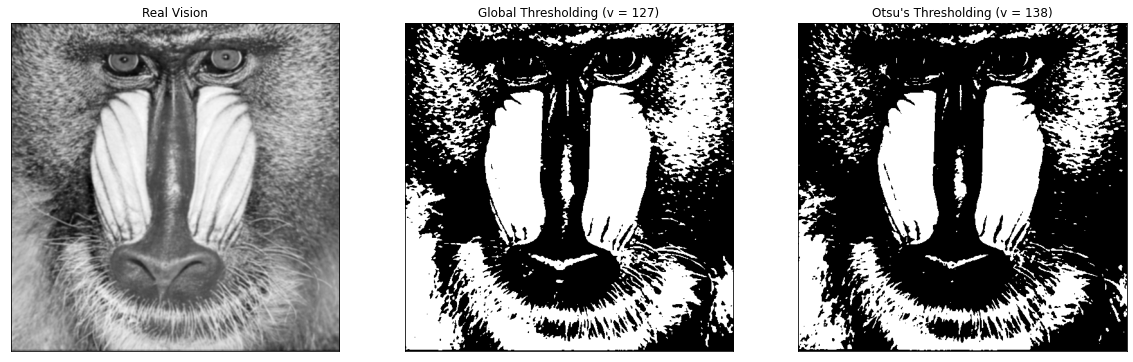

In [6]:
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff',0) 
blurred_img = cv. GaussianBlur (img, (5,5),0)

histogrm = cv.calcHist([blurred_img],[0],None,[256], [0,256]) 
hist_norm = histogrm.ravel()/histogrm.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
variationmax = 0 
fn_min = np.inf 
thresh = -1 
for i in range(0,255):
  wb += histogrm[i] 
  wf = (img.shape[0]*img.shape[1]) - wb 
  sumb += (i*histogrm[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  varbetween = wb * wf * (mb - mf) * (mb - mf) 
  if (varbetween>variationmax):
    variationmax = varbetween
    thresh = i 
x = ("Otsu's Thresholding (v = ")+str(thresh)+")" 
ret, th1 = cv.threshold(blurred_img, 127, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (blurred_img, thresh, 255, cv. THRESH_BINARY)

titles = ['Real Vision', 'Global Thresholding (v = 127)', x] 
citra3 = [blurred_img, th1, th2]

plt. figure(figsize = (20,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

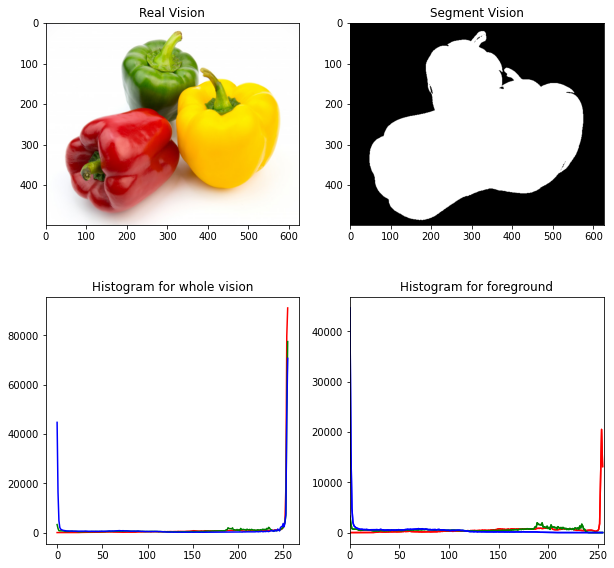

In [7]:
img = cv.imread('/content/drive/MyDrive/Images/peppers.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
thresh = 200

ret,mask = cv.threshold(img_gray,thresh,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Real Vision')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Segment Vision')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram for whole vision')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram for whole vision')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram for foreground')
    plt.xlim([0,256])

plt.show()

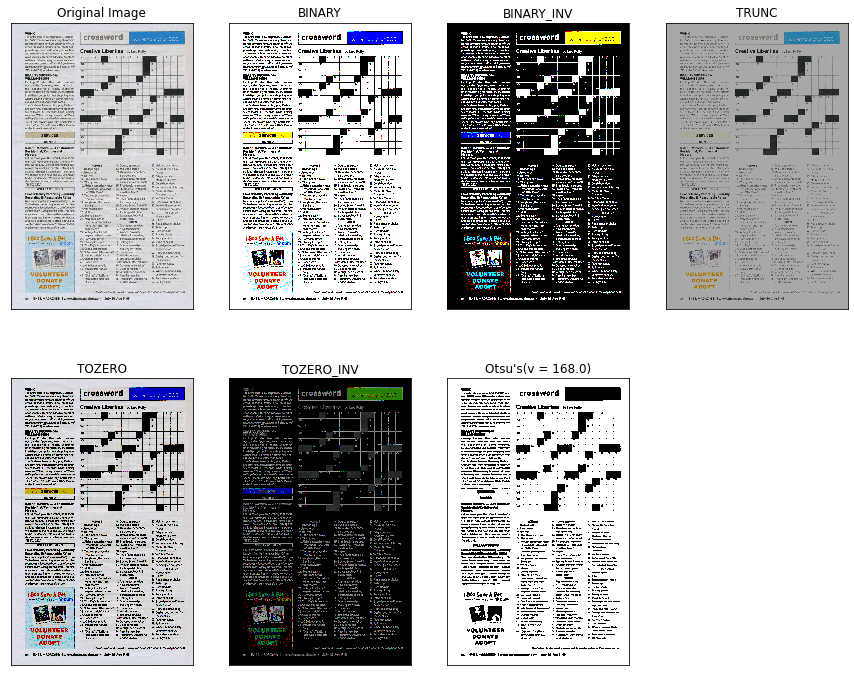

In [8]:
img = cv.imread('/content/drive/MyDrive/Images/crossword.jpg')
img_gray= cv.cvtColor(img, cv.COLOR_RGB2GRAY)
blur = cv.GaussianBlur(img_gray,(5,5),0)
thresh = 168

ret, thresh1 = cv.threshold(img, thresh,255,cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, thresh,255,cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, thresh,255,cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, thresh,255,cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, thresh,255,cv.THRESH_TOZERO_INV)
ret2, th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's(v = ") + str(ret2)+")"
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV',x]
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5,th2]

plt.figure(figsize = (15,12))

for i in range(len(images)):
  plt.subplot(2,4,i+1), plt.imshow(images[i], 'gray', interpolation = 'nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()